In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy import stats

# The NBA Dataset Ethical Audit
The NBA Dataset contains multiple csv files each having there own theme. One of the files for example, is called games.csv and it contains team data (such as how many points a team scored, who won, how many points the opponent scored and these games can be traced back all the way to the 2013 season.There are a few consideration that should be considered when using this dataset however.

The first is because there are multiple files you are going to have to connect the two files to get the full picture. So for example one file would contain a player name and a player id and another file will contain all players stats that a player had that game. 

Another thing, is this dataset does not contain every single piece of data of the nba. It does not have a players wingspan, or height. It does not contain any advanced stats. It more focuses on the simple statistics such as how many points a player/team scored, how many assists did a player have, how well did he shoot the ball.

According to the last piece of record on this dataset, I can make the assumption that the person who created this dataset created it in 2022-12-22 because that is the last piece of data which can be seen in this dataset. This makes it a bit unfortunate because that means I can not use the data from the 2022-2023 season, due to the fact that it was not complete.

An additional analysis revealed is this dataset does not split the regular season games, playoffs or preseason games. Instead it simply stores it all under the same files so in order to differentiate between the 3, I have to manually put in the dates for which time the regular season started because I am going to be doing my analysis primarily on the regular season due to its large data sample.

# CLEANING UP DATA/Exploratory Analysis

In [2]:
# game_detail is a dataframe which has every single stat that a player had.
pd.set_option('display.max_columns', None)
games_detail = pd.read_csv('games_details.csv')
games_detail.info()

C:\Users\Eitan\AppData\Local\Temp\ipykernel_12868\1314081068.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_detail = pd.read_csv('games_details.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668628 entries, 0 to 668627
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            668628 non-null  int64  
 1   TEAM_ID            668628 non-null  int64  
 2   TEAM_ABBREVIATION  668628 non-null  object 
 3   TEAM_CITY          668628 non-null  object 
 4   PLAYER_ID          668628 non-null  int64  
 5   PLAYER_NAME        668628 non-null  object 
 6   NICKNAME           53037 non-null   object 
 7   START_POSITION     255765 non-null  object 
 8   COMMENT            109689 non-null  object 
 9   MIN                558938 non-null  object 
 10  FGM                558938 non-null  float64
 11  FGA                558938 non-null  float64
 12  FG_PCT             558938 non-null  float64
 13  FG3M               558938 non-null  float64
 14  FG3A               558938 non-null  float64
 15  FG3_PCT            558938 non-null  float64
 16  FT

In [3]:
# games contains all the games with attributes such as who won, team stats, away team stats
games = pd.read_csv('games.csv')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      26651 non-null  int64  
 4   VISITOR_TEAM_ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away       26552 non-null  float6

In [4]:
# Simple dataframe which contains player name and what season they played
players_df = pd.read_csv("players.csv")
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7228 entries, 0 to 7227
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PLAYER_NAME  7228 non-null   object
 1   TEAM_ID      7228 non-null   int64 
 2   PLAYER_ID    7228 non-null   int64 
 3   SEASON       7228 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 226.0+ KB


In [5]:
# This is a dataframe which only contains the regular season games from the year 21-22.
# Reason why I am distinguishing between regular season and playoffs is because I believe 
# in the playoffs, basketball becomes more intense.
rs_21_22 = (games.loc[(games['GAME_DATE_EST'] >= '2021-10-19') & (games['GAME_DATE_EST'] < '2022-04-15')])
rs_21_22

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
631,2022-04-13,52100111,Final,1610612737,1610612766,2021,1610612737,132.0,0.521,0.720,0.500,31.0,54.0,1610612766,103.0,0.378,0.759,0.317,22.0,41.0,1
632,2022-04-13,52100131,Final,1610612740,1610612759,2021,1610612740,113.0,0.543,0.739,0.400,25.0,53.0,1610612759,103.0,0.407,0.727,0.382,19.0,34.0,1
633,2022-04-12,52100101,Final,1610612751,1610612739,2021,1610612751,115.0,0.536,0.667,0.321,33.0,43.0,1610612739,108.0,0.446,0.850,0.346,26.0,40.0,1
634,2022-04-12,52100121,Final,1610612750,1610612746,2021,1610612750,109.0,0.434,0.622,0.400,19.0,49.0,1610612746,104.0,0.436,0.741,0.457,19.0,39.0,1
635,2022-04-10,22101216,Final,1610612751,1610612754,2021,1610612751,134.0,0.642,0.880,0.364,30.0,50.0,1610612754,126.0,0.452,0.684,0.413,32.0,30.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860,2021-10-20,22100011,Final,1610612762,1610612760,2021,1610612762,107.0,0.440,0.867,0.298,18.0,53.0,1610612760,86.0,0.374,0.611,0.200,19.0,50.0,1
1861,2021-10-20,22100012,Final,1610612756,1610612743,2021,1610612756,98.0,0.414,0.706,0.378,23.0,45.0,1610612743,110.0,0.530,0.556,0.436,25.0,46.0,0
1862,2021-10-20,22100013,Final,1610612757,1610612758,2021,1610612757,121.0,0.484,0.864,0.343,25.0,49.0,1610612758,124.0,0.457,0.793,0.415,24.0,43.0,0
1863,2021-10-19,22100001,Final,1610612749,1610612751,2021,1610612749,127.0,0.457,0.778,0.378,25.0,54.0,1610612751,104.0,0.440,0.565,0.531,19.0,44.0,1


In [6]:
rs_21_22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1234 entries, 631 to 1864
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     1234 non-null   object 
 1   GAME_ID           1234 non-null   int64  
 2   GAME_STATUS_TEXT  1234 non-null   object 
 3   HOME_TEAM_ID      1234 non-null   int64  
 4   VISITOR_TEAM_ID   1234 non-null   int64  
 5   SEASON            1234 non-null   int64  
 6   TEAM_ID_home      1234 non-null   int64  
 7   PTS_home          1234 non-null   float64
 8   FG_PCT_home       1234 non-null   float64
 9   FT_PCT_home       1234 non-null   float64
 10  FG3_PCT_home      1234 non-null   float64
 11  AST_home          1234 non-null   float64
 12  REB_home          1234 non-null   float64
 13  TEAM_ID_away      1234 non-null   int64  
 14  PTS_away          1234 non-null   float64
 15  FG_PCT_away       1234 non-null   float64
 16  FT_PCT_away       1234 non-null   float64
 17

Markdown explaining each variable name
- PTS_home - how many points the home team scored that game
- FG_PCT_home - what was the shooting percentage the home team shot that night. So if they shot 10 times and made 6, there FG_PCT would be 60% or 0.60
- FT_PCT_home - the free throw percentage the home team shot that game. If they shot 10 freethrows and made 8, there FT_PCT would be 0.80
- FG3_PCT_home - the percentage of a 3 point attempt
- (All the aways columns are the same as the home except its for the other team that game)

In [7]:
# as we can see above, we have some object values which do not work with .mean() operation.
# To fix this I am going to remove these in order to obtain a team's average stats for that 
# season.
rs_21_22 = rs_21_22.drop(['GAME_DATE_EST', 'GAME_STATUS_TEXT', 'VISITOR_TEAM_ID'], axis=1)
rs_avg_21_22 = rs_21_22.groupby('HOME_TEAM_ID').mean()
rs_avg_21_22

,GAME_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
HOME_TEAM_ID,,,,,,,,,,,,,,,,,
1610612737,2.281488e+07,2021.0,1.610613e+09,117.023810,0.483810,0.819690,0.382905,25.333333,43.857143,1.610613e+09,111.476190,0.466381,0.791238,0.364143,24.785714,43.238095,0.666667
1610612738,2.210062e+07,2021.0,1.610613e+09,110.756098,0.467390,0.818756,0.351439,24.512195,45.609756,1.610613e+09,103.780488,0.440585,0.795927,0.348488,21.487805,43.146341,0.682927
1610612739,2.210063e+07,2021.0,1.610613e+09,108.073171,0.468220,0.750610,0.358171,25.414634,44.780488,1.610613e+09,103.658537,0.450024,0.764439,0.329220,24.560976,43.024390,0.609756
1610612740,2.281491e+07,2021.0,1.610613e+09,111.404762,0.468833,0.793595,0.333595,25.833333,45.523810,1.610613e+09,109.880952,0.470310,0.778238,0.368619,24.095238,41.166667,0.476190
1610612741,2.210062e+07,2021.0,1.610613e+09,114.195122,0.485659,0.808585,0.373683,24.292683,43.658537,1.610613e+09,111.780488,0.475244,0.791878,0.363293,25.073171,42.609756,0.658537
1610612742,2.210063e+07,2021.0,1.610613e+09,108.365854,0.460561,0.754805,0.355049,23.170732,43.243902,1.610613e+09,102.073171,0.452122,0.753220,0.316707,22.731707,44.097561,0.707317
1610612743,2.210066e+07,2021.0,1.610613e+09,114.780488,0.483366,0.799537,0.351707,28.121951,44.024390,1.610613e+09,112.390244,0.477244,0.767659,0.363927,25.048780,42.365854,0.560976
1610612744,2.210058e+07,2021.0,1.610613e+09,113.000000,0.474268,0.775146,0.370073,28.170732,46.780488,1.610613e+09,103.121951,0.423146,0.773024,0.327659,21.878049,43.243902,0.756098
1610612745,2.210067e+07,2021.0,1.610613e+09,111.926829,0.460951,0.721610,0.361951,24.634146,41.317073,1.610613e+09,118.731707,0.480488,0.777317,0.355610,25.317073,46.365854,0.268293


In [8]:
players_21_22 = pd.merge(rs_21_22, games_detail, on='GAME_ID')
players_21_22 = players_21_22.drop(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'NICKNAME', 'COMMENT',
                       'HOME_TEAM_ID',   'SEASON',  'TEAM_ID_home', 'PTS_home',  'FG_PCT_home',
                         'FT_PCT_home',  'FG3_PCT_home',  'AST_home',  'REB_home', 'TEAM_ID_away',  'PTS_away',  'FG_PCT_away',  
                         'FT_PCT_away', 'FG3_PCT_away', 'AST_away',  'REB_away', 'HOME_TEAM_WINS', 'START_POSITION'], axis=1)
players_21_22 = players_21_22.dropna(axis='rows', thresh=20)
players_21_22

,PLAYER_ID,PLAYER_NAME,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,1628970,Miles Bridges,29:55,5.0,11.0,0.455,0.0,4.0,0.000,2.0,2.0,1.00,1.0,3.0,4.0,4.0,0.0,1.0,2.0,4.0,12.0,-30.0
1,1629023,P.J. Washington,38:10,7.0,10.0,0.700,3.0,5.0,0.600,0.0,0.0,0.00,0.0,6.0,6.0,2.0,1.0,2.0,0.0,4.0,17.0,-18.0
2,203486,Mason Plumlee,11:27,1.0,1.0,1.000,0.0,0.0,0.000,1.0,2.0,0.50,2.0,2.0,4.0,2.0,0.0,0.0,1.0,1.0,3.0,-10.0
3,1626179,Terry Rozier,36:29,8.0,22.0,0.364,2.0,8.0,0.250,3.0,3.0,1.00,2.0,2.0,4.0,3.0,0.0,0.0,5.0,2.0,21.0,-29.0
4,1630163,LaMelo Ball,38:20,7.0,25.0,0.280,4.0,14.0,0.286,8.0,10.0,0.80,2.0,3.0,5.0,8.0,1.0,0.0,3.0,5.0,26.0,-13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31419,200765,Rajon Rondo,19:49,1.0,4.0,0.250,1.0,3.0,0.333,0.0,0.0,0.00,0.0,0.0,0.0,5.0,2.0,0.0,3.0,2.0,3.0,1.0
31420,2546,Carmelo Anthony,26:04,3.0,9.0,0.333,2.0,4.0,0.500,1.0,2.0,0.50,0.0,4.0,4.0,2.0,0.0,0.0,1.0,2.0,9.0,-5.0
31421,1628370,Malik Monk,18:44,2.0,5.0,0.400,2.0,4.0,0.500,0.0,0.0,0.00,0.0,3.0,3.0,1.0,2.0,0.0,1.0,1.0,6.0,-10.0
31422,2730,Dwight Howard,12:49,1.0,2.0,0.500,0.0,0.0,0.000,3.0,4.0,0.75,0.0,6.0,6.0,0.0,0.0,0.0,2.0,2.0,5.0,-7.0


In [9]:
# Am also going to need to convert the minutes from objects to numeric:
players_21_22[['minutes', 'seconds']] = players_21_22['MIN'].str.split(':', n=1, expand=True)
players_21_22['minutes'] = players_21_22['minutes'].astype(float)
players_21_22['seconds'] = players_21_22['seconds'].astype(float)
players_21_22['MIN'] = players_21_22['minutes'] + players_21_22['seconds'] / 60
players_21_22 = players_21_22.drop(['minutes', 'seconds'], axis=1)

players_21_22['GP'] = 1

players_21_22

,PLAYER_ID,PLAYER_NAME,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,GP
0,1628970,Miles Bridges,29.916667,5.0,11.0,0.455,0.0,4.0,0.000,2.0,2.0,1.00,1.0,3.0,4.0,4.0,0.0,1.0,2.0,4.0,12.0,-30.0,1
1,1629023,P.J. Washington,38.166667,7.0,10.0,0.700,3.0,5.0,0.600,0.0,0.0,0.00,0.0,6.0,6.0,2.0,1.0,2.0,0.0,4.0,17.0,-18.0,1
2,203486,Mason Plumlee,11.450000,1.0,1.0,1.000,0.0,0.0,0.000,1.0,2.0,0.50,2.0,2.0,4.0,2.0,0.0,0.0,1.0,1.0,3.0,-10.0,1
3,1626179,Terry Rozier,36.483333,8.0,22.0,0.364,2.0,8.0,0.250,3.0,3.0,1.00,2.0,2.0,4.0,3.0,0.0,0.0,5.0,2.0,21.0,-29.0,1
4,1630163,LaMelo Ball,38.333333,7.0,25.0,0.280,4.0,14.0,0.286,8.0,10.0,0.80,2.0,3.0,5.0,8.0,1.0,0.0,3.0,5.0,26.0,-13.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31419,200765,Rajon Rondo,19.816667,1.0,4.0,0.250,1.0,3.0,0.333,0.0,0.0,0.00,0.0,0.0,0.0,5.0,2.0,0.0,3.0,2.0,3.0,1.0,1
31420,2546,Carmelo Anthony,26.066667,3.0,9.0,0.333,2.0,4.0,0.500,1.0,2.0,0.50,0.0,4.0,4.0,2.0,0.0,0.0,1.0,2.0,9.0,-5.0,1
31421,1628370,Malik Monk,18.733333,2.0,5.0,0.400,2.0,4.0,0.500,0.0,0.0,0.00,0.0,3.0,3.0,1.0,2.0,0.0,1.0,1.0,6.0,-10.0,1
31422,2730,Dwight Howard,12.816667,1.0,2.0,0.500,0.0,0.0,0.000,3.0,4.0,0.75,0.0,6.0,6.0,0.0,0.0,0.0,2.0,2.0,5.0,-7.0,1


In [10]:
# Finding the Mean, min, max, median quartiles of players in the 2021-2022 season
players_avg_21_22 = players_21_22.groupby(['PLAYER_ID', 'PLAYER_NAME']).mean()
players_avg_21_22.describe()

,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,GP
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.0
mean,18.903035,3.031231,6.712366,0.384339,0.915140,2.680185,0.216080,1.248718,1.629453,0.348311,0.827149,2.617848,3.444997,1.862892,0.606432,0.367827,1.012406,1.598574,8.226321,-0.647666,1.0
std,9.761743,2.293680,4.821751,0.144272,0.864628,2.267556,0.133028,1.307475,1.608918,0.224258,0.746670,1.834354,2.401203,1.829435,0.415882,0.374456,0.824434,0.797325,6.335793,3.669954,0.0
min,0.850000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-30.666667,1.0
25%,11.073409,1.305254,3.226263,0.331329,0.203068,0.851190,0.112224,0.400000,0.553571,0.177468,0.333333,1.285040,1.750000,0.600000,0.308741,0.117305,0.466667,1.016288,3.497222,-2.369963,1.0
50%,18.116687,2.564660,5.491379,0.405667,0.704397,2.142961,0.245108,0.937004,1.224747,0.337334,0.596259,2.355042,3.000000,1.215557,0.541667,0.275986,0.811012,1.610434,6.846712,-0.526794,1.0
75%,27.280692,4.114583,9.119485,0.463943,1.388281,4.085227,0.322843,1.634443,2.133224,0.499643,1.128233,3.468251,4.506507,2.485390,0.871976,0.500000,1.287071,2.207983,11.112332,1.366477,1.0
max,43.520833,11.428571,21.803571,1.000000,4.453125,11.718750,0.500000,9.617647,11.808824,1.000000,4.592105,11.015152,14.666667,10.800000,2.333333,2.809524,4.492308,3.750000,30.573529,12.000000,1.0


In [11]:
# How many guards, centers, and forwards are there in the league:
# Seems to have a ratio between these positions. Centers have a 1:5 ratio, Forwards have
# a 2:5 ratio and Guards also have a 2:5 ratio. This does make sence because in the NBA,
# there are 5 positions. 2 Guards, 2 Forwards and 1 Center, so its cool to see that statistic
# visualized.
games_detail.groupby('START_POSITION').count()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,COMMENT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
START_POSITION,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C,51141,51141,51141,51141,51141,51141,4000,0,51141,51141,51141,51141,51141,51141,51141,51141,51141,51141,51141,51141,51141,51141,51141,51141,51141,51141,51141,51141
F,102309,102309,102309,102309,102309,102309,8000,0,102309,102309,102309,102309,102309,102309,102309,102309,102309,102309,102309,102309,102309,102309,102309,102309,102309,102309,102309,102309
G,102315,102315,102315,102315,102315,102315,8000,0,102315,102315,102315,102315,102315,102315,102315,102315,102315,102315,102315,102315,102315,102315,102315,102315,102315,102315,102315,102315


# Stat Correlation
Here we are going to see if there is player stats that correlate with one another

For this we are going to need each player's stats from the 21-22 season


In [12]:
# Here what we want to do is divide the stats by the minutes played. The reason why we do this is becuase the 
# more a player plays, the more he will naturally produce more stats. So what we want to see is what his stats
# are per minute played. NOT PER GAME.
# We slice the dataframe from the first column because the first column (MIN) is not needed for this dataframe
players_total_rs_21_22 = players_21_22.groupby(['PLAYER_ID', 'PLAYER_NAME']).sum()
players_perMin_21_22 = players_total_rs_21_22

for col in players_perMin_21_22.columns[1:-1]:
    players_perMin_21_22[col] = players_total_rs_21_22[col]/players_total_rs_21_22['MIN']
players_perMin_21_22

,,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,GP
PLAYER_ID,PLAYER_NAME,,,,,,,,,,,,,,,,,,,,,
2207,Joe Johnson,1.950000,0.512821,0.512821,0.512821,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.025641,-2.564103,1
2544,LeBron James,2084.366667,0.307048,0.585789,0.014077,0.077242,0.214933,0.009554,0.121860,0.161200,0.020555,0.030225,0.189986,0.220211,0.167437,0.035023,0.028306,0.094033,0.058051,0.813197,-0.056132,56
2546,Carmelo Anthony,1793.233333,0.177891,0.403182,0.016742,0.083090,0.221388,0.013643,0.073610,0.088667,0.022948,0.034574,0.126029,0.160604,0.037920,0.026210,0.028998,0.032901,0.092570,0.512482,-0.049073,69
2617,Udonis Haslem,83.216667,0.168236,0.372522,0.068496,0.012017,0.048067,0.012017,0.036050,0.036050,0.012017,0.048067,0.252353,0.300421,0.048067,0.012017,0.012017,0.060084,0.180252,0.384538,-0.180252,13
2730,Dwight Howard,970.733333,0.138040,0.225603,0.034187,0.008241,0.015452,0.006524,0.098894,0.150402,0.029777,0.121558,0.245175,0.366733,0.036055,0.035025,0.037085,0.048417,0.118467,0.383215,-0.131859,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630758,Aleem Ford,73.533333,0.081596,0.271985,0.015857,0.027199,0.203989,0.005440,0.000000,0.000000,0.000000,0.027199,0.176791,0.203989,0.027199,0.013599,0.000000,0.054397,0.095195,0.190390,-0.475975,5
1630787,Cameron McGriff,45.966667,0.108774,0.304569,0.022473,0.043510,0.130529,0.018122,0.043510,0.043510,0.021755,0.130529,0.195794,0.326323,0.065265,0.000000,0.021755,0.000000,0.152284,0.304569,0.174039,3
1630792,Malcolm Hill,212.083333,0.113163,0.245187,0.026678,0.061297,0.169745,0.019488,0.051866,0.066012,0.018078,0.051866,0.113163,0.165029,0.037721,0.033006,0.014145,0.014145,0.113163,0.339489,-0.146169,19


In [13]:
# Now, I want to remove players who dont play that many minutes to begin with.
# As we can see, 81% of players played over 100 minutes, which means around 20% did not.
(players_perMin_21_22['MIN'] >= 100).mean()

0.8157894736842105

In [14]:
players_perMin_21_22_over100 = players_perMin_21_22.loc[players_perMin_21_22['MIN'] >= 100]

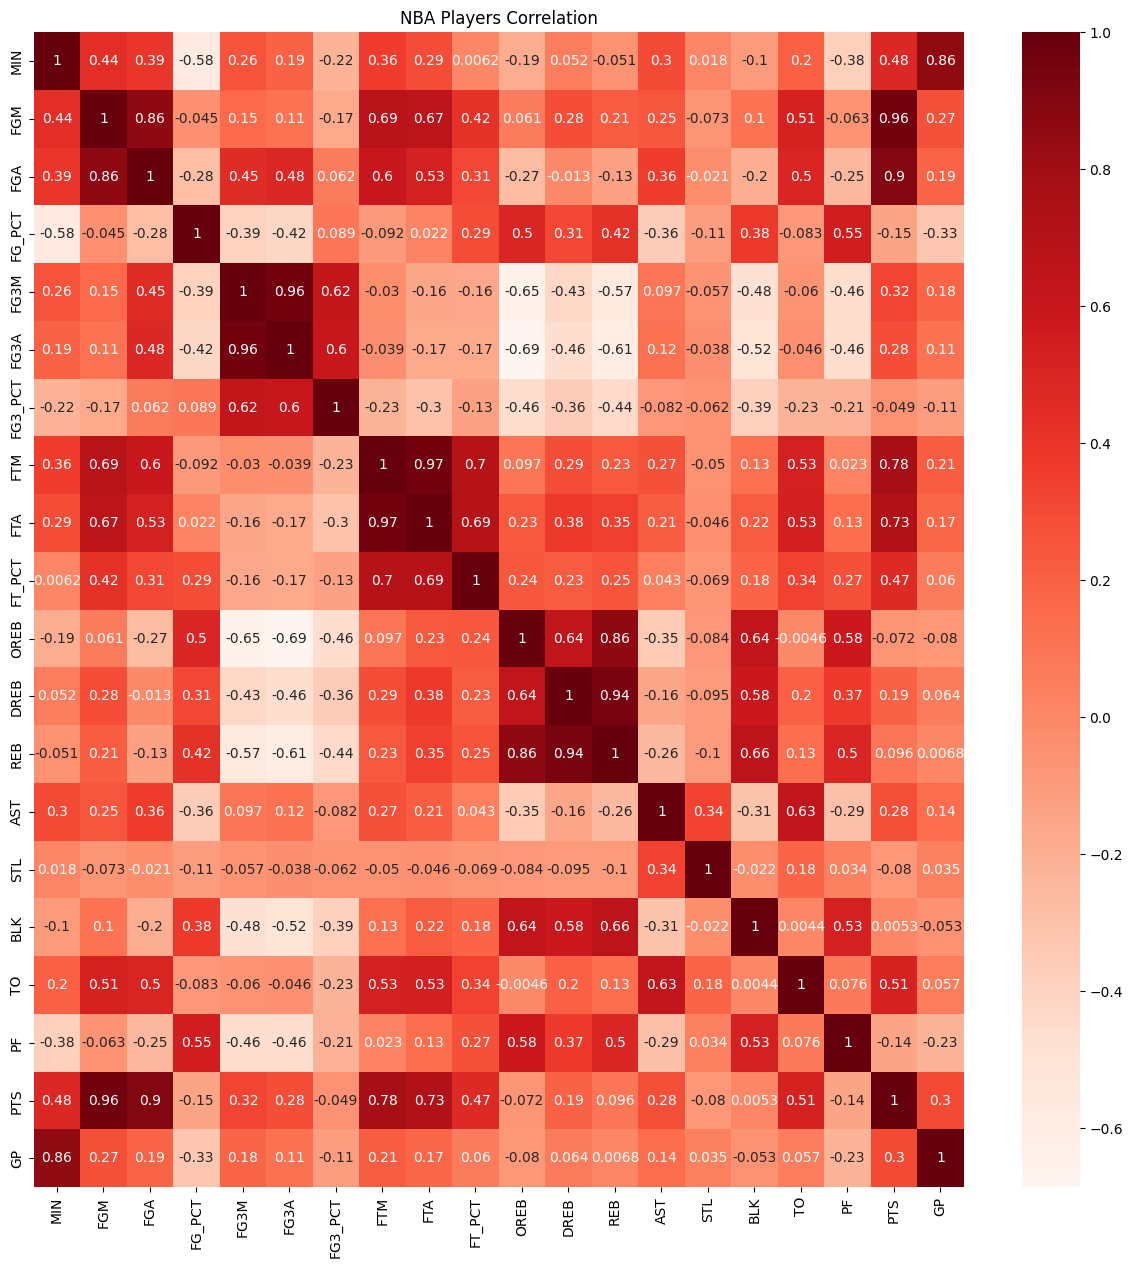

In [15]:
stat_corr = players_perMin_21_22_over100.drop(['PLUS_MINUS'], axis=1)
plt.figure(figsize=(15, 15))
plt.title('NBA Players Correlation')
sns.heatmap(stat_corr.corr(), annot = True, cmap='Reds')
plt.show()

Markdown explaining each variable name
- MIN - how many minutes that player played.
- FGM - how many shots that player made (includes 3 point makes)
- FGA - how many shots a player attempted (includes 3 point attempts)
- FG3M - How many 3 point shots a player made.
- FG3A - hwo many 3 point shots a player attempted.
- FTM - how many free throws a player made
- FTA - how many free throws a player attempted
- FT_PCT - FTM/FTA
- OREB - Offensive Rebounds. This occurs when the offensive team (the one trying to score a basket) misses a shot, but get the reabound and therefor get a second chance to score
- DREB - Deffensive Rebound. This occurs when the offensive team misses a shot and the defensive team gets the rebound.
- REB - OREB + DREB
- AST - Assists. This happens when a player "assisted" another player and helped him score
- STL - Steals. This happens when a defensive player steals the ball from a offensive player.
- BLK - Blocks. This happens when a defensive player blocks a shot attempt from an offensive player
- PTS_home - how many points the home team scored that game
- FG_PCT_home - what was the shooting percentage the home team shot that night. So if they shot 10 times and made 6, there FG_PCT would be 60% or 0.60
- FT_PCT_home - the free throw percentage the home team shot that game. If they shot 10 freethrows and made 8, there FT_PCT would be 0.80
- FG3_PCT_home - the percentage of a 3 point attempt
- (All the aways columns are the same as the home except its for the other team that game)
- PLUS_MINUS - A stat that meassures how much impact a player had since he got on the court. Did the score change in a positive or a negative direction?

Some interesting stats I found from this heatmap:

    - Players who rebound well, tend to not shoot the ball from the 3 point line. This 
      does make sence because players who rebound alot, are mostly centers and these 
      are the players who will be around the rim, far away from the 3 point line
      
    - Players who attempt 3 pointers have their FG_PCT decrease which is there overall
      field goal attempts. This makes sence because a 3 point attempt is more difficult to 
      make
      
    - Players who have a lot of PF (personal fouls) tend to not take alot of 3s, and tend
      to have alot of REB (rebounds). This leans into the idea that centers tend to get more
      physical when fighting for the rebound. 
      
    - An interesting stat that I found was there seems to be a somewhat positive correlation
      between asists and steals. My guess for this is guards who are the playmakers are responsible
      for asists would need to use there hands more resulting in steal.

In [16]:
# H0: There is no correlation between players who rebound well and shoot the ball from 3
# H1: The correlation between players who rebound well and shoot the ball from 3 is nonzero
# Among NBA players, Rebounding and 3 point attempts are negatively correlated (r = -0.61, p < 0.01)
stats.pearsonr(players_perMin_21_22_over100['REB'], players_perMin_21_22_over100['FG3A'])

PearsonRResult(statistic=-0.6056273239942895, pvalue=5.680542046720575e-51)

In [17]:
# H0: There is no correlation between players who attempt a lot of 3s and they're field goal percentage
# H1: The correlation between players who shoot attempt a lot of 3s and they're field goal percentage is nonzero
# Among NBA players, Rebounding and 3 point attempts are negatively correlated (r = -0.42, p < 0.01)
stats.pearsonr(players_perMin_21_22_over100['FG3A'], players_perMin_21_22_over100['FG_PCT'])

PearsonRResult(statistic=-0.42210028661909543, pvalue=7.530424212183913e-23)

In [18]:
# H0: There is no correlation between players who take a lot of 3s and players who get a lot of fouls
# H1: The correlation between players who take a lot of 3s and players who get a lot of fouls is nonzero
# Among NBA players, Rebounding and 3 point attempts are negatively correlated (r = -0.45, p < 0.01)
stats.pearsonr(players_perMin_21_22_over100['PF'], players_perMin_21_22_over100['FG3A'])

PearsonRResult(statistic=-0.4578298836322357, pvalue=4.549777025774396e-27)

In [19]:
# H0: There is no correlation between players who get assists and players who get steals
# H1: The correlation between players who get assists and players who get steals is nonzero
# Among NBA players, Rebounding and 3 point attempts are negatively correlated (r = 0.34, p < 0.01)
stats.pearsonr(players_perMin_21_22_over100['AST'], players_perMin_21_22_over100['STL'])

PearsonRResult(statistic=0.3401822559089217, pvalue=6.666432143417922e-15)

As we can see, the pvalue is far too small for there to be any insignificant correlations. We can therefor say that there is some correlation between the variables above.

# Distribution of minutes in the NBA 


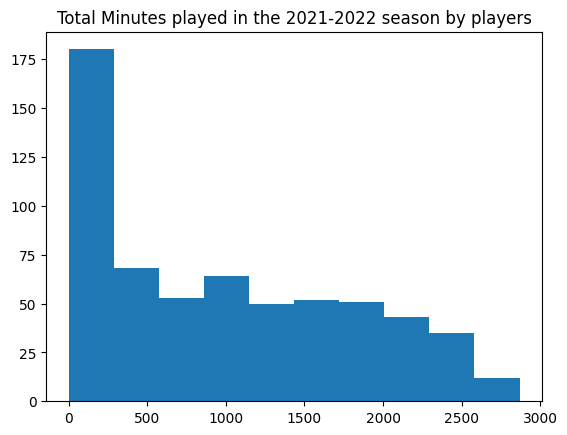

In [20]:
plt.hist(players_perMin_21_22['MIN'])
plt.title('Total Minutes played in the 2021-2022 season by players')
plt.show()

Out of 608 players, around 180 play between 0 - 250 minutes. That would mean %30 of players in NBA dont really play that much.  This also does not even take into acount players who did not even step foot in the nba. 

I am curious to see how this will dwell against the playoffs. I would imagine the extremes get worst because the good players would play more minutes, while the bad players probably dont step foot on the court. This would result in a more tight team.

In [21]:
# To do this, I first need to find the days which the 2021-2022 playoffs occured so I can get the sample:
playoffs_21_22 = (games.loc[(games['GAME_DATE_EST'] >= '2022-04-16') & (games['GAME_DATE_EST'] < '2022-06-17')])

players_playoffs_21_22 = pd.merge(playoffs_21_22, games_detail, on='GAME_ID')
players_playoffs_21_22 = players_playoffs_21_22.drop(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'NICKNAME', 'COMMENT',
                       'HOME_TEAM_ID',   'SEASON',  'TEAM_ID_home', 'PTS_home',  'FG_PCT_home',
                         'FT_PCT_home',  'FG3_PCT_home',  'AST_home',  'REB_home', 'TEAM_ID_away',  'PTS_away',  'FG_PCT_away',  
                         'FT_PCT_away', 'FG3_PCT_away', 'AST_away',  'REB_away', 'HOME_TEAM_WINS', 'START_POSITION', 'GAME_DATE_EST',
                        'GAME_STATUS_TEXT', 'VISITOR_TEAM_ID'], axis=1)
players_playoffs_21_22 = players_playoffs_21_22.dropna(axis='rows', thresh=20)
players_playoffs_21_22['GP'] = 1
players_playoffs_21_22[['minutes', 'seconds']] = players_playoffs_21_22['MIN'].str.split(':', n=1, expand=True)
players_playoffs_21_22['minutes'] = players_playoffs_21_22['minutes'].astype(float)
players_playoffs_21_22['seconds'] = players_playoffs_21_22['seconds'].astype(float)
players_playoffs_21_22['MIN'] = players_playoffs_21_22['minutes'] + players_playoffs_21_22['seconds'] / 60.0
players_playoffs_21_22 = players_playoffs_21_22.drop(['minutes', 'seconds'], axis=1)

players_total_playoffs_21_22 = players_playoffs_21_22.groupby(['PLAYER_ID', 'PLAYER_NAME']).sum()
players_total_playoffs_21_22

,,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,GP
PLAYER_ID,PLAYER_NAME,,,,,,,,,,,,,,,,,,,,,
2738,Andre Iguodala,61.416667,4.0,9.0,1.750,1.0,3.0,1.000,2.0,3.0,0.667,3.0,4.0,7.0,12.0,0.0,2.0,4.0,11.0,11.0,-19.0,7
101108,Chris Paul,447.650000,87.0,155.0,7.041,19.0,49.0,5.833,35.0,37.0,8.375,7.0,47.0,54.0,108.0,19.0,2.0,31.0,40.0,228.0,7.0,13
200768,Kyle Lowry,294.900000,25.0,86.0,2.557,13.0,54.0,2.230,15.0,19.0,3.467,3.0,33.0,36.0,47.0,12.0,7.0,19.0,29.0,78.0,16.0,10
200782,P.J. Tucker,509.316667,54.0,109.0,8.416,23.0,51.0,7.783,11.0,16.0,3.750,35.0,67.0,102.0,32.0,14.0,5.0,13.0,50.0,142.0,52.0,18
200794,Paul Millsap,5.633333,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630567,Scottie Barnes,132.950000,18.0,42.0,1.734,2.0,12.0,0.286,13.0,16.0,2.578,7.0,29.0,36.0,17.0,4.0,1.0,5.0,12.0,51.0,-27.0,4
1630573,Sam Hauser,14.683333,1.0,4.0,0.500,1.0,3.0,0.500,2.0,2.0,1.000,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,5.0,8.0,7
1630625,Dalano Banton,7.633333,2.0,2.0,2.000,0.0,0.0,0.000,3.0,6.0,1.833,2.0,0.0,2.0,1.0,1.0,0.0,1.0,0.0,7.0,-11.0,4


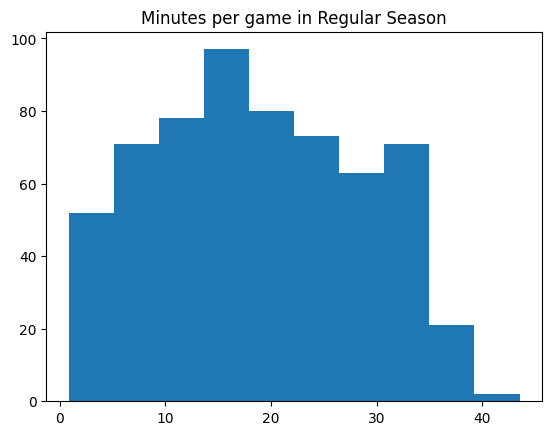

In [22]:
# To make this fair, I am going to calculate this based off minutes per game played
players_perMin_playoffs_21_22 = players_total_playoffs_21_22['MIN']/players_total_playoffs_21_22['GP']
players_perMin_rs_21_22 = players_total_rs_21_22['MIN']/players_total_rs_21_22['GP']

# Regular Season
plt.hist(players_perMin_rs_21_22)
plt.title("Minutes per game in Regular Season")
plt.show()

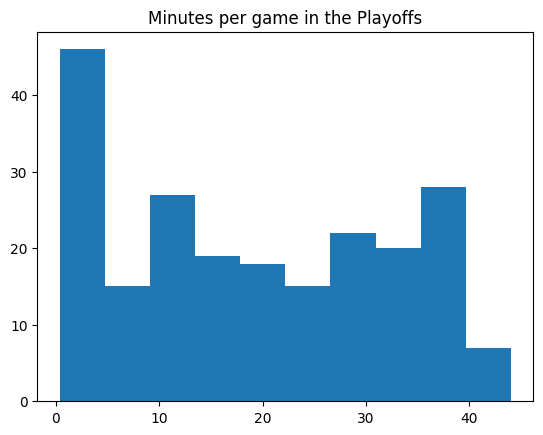

In [23]:
# Playoffs
plt.hist(players_perMin_playoffs_21_22)
plt.title("Minutes per game in the Playoffs")
plt.show()

As I expected, when the playoffs come the minutes for distribution starts skewing to the 2 extremes. From this we can say a cause for this occurence is the coach needs his best players to play while the role players play less. 

A question that we can get out of these differences is if the average minutes played in the playoffs and the average minutes played in the regular season are significant.

In [24]:
print("Average minutes per game in regular season:", players_perMin_rs_21_22.mean())
print("Average minutes per game in playoffs:", players_perMin_playoffs_21_22.mean())

Average minutes per game in regular season: 18.903034502328875
Average minutes per game in playoffs: 19.425664180892436


What we can do is use the T-test to see if the means between the stats are different.

Null hypothesis: The means of the 2 groups is the same.

Alternative hypothesis: The means of the 2 groups are different.

In [25]:
stats.ttest_ind(players_perMin_rs_21_22, players_perMin_playoffs_21_22)

Ttest_indResult(statistic=-0.6196127393333207, pvalue=0.5356842729314805)

The pvalue is too great so we fail to reject the null hypothesis and we can state:

"Minutes per game in the regular season is 18.9, and minutes per game in the playoffs is 19.4. The difference is statistically insignificant at p = 0.53"

# Game change in past 9 years
In the basketball world, we have a saying that Stephen Curry revolutionized the game of baskeball. He showed the world that if you are really really really good at shooting, you can chuck it from anywhere. This 'revolution' started around his first MVP season in the 2014-2015 season. I want to track each season from 2013-2014 all the way until the 2021-2022 season to see how the game changed thanks to Stephen.

In [26]:
temp = games.loc[(games['SEASON'] >= 2013) & (games['SEASON'] < 2022)]

# For some reason, the games.csv file does not have all the stats, so I am going to merge it with the games_detail dataset
# and groupby teamID and SEASON

games_2013_2022 = pd.merge(temp, games_detail, on="GAME_ID")
games_2013_2022 = games_2013_2022.drop([ 'TEAM_ABBREVIATION', 'TEAM_CITY', 'NICKNAME', 'COMMENT',
                       'HOME_TEAM_ID',  'TEAM_ID_home', 'PTS_home',  'FG_PCT_home',
                         'FT_PCT_home',  'FG3_PCT_home',  'AST_home',  'REB_home', 'TEAM_ID_away',  'PTS_away',  'FG_PCT_away',  
                         'FT_PCT_away', 'FG3_PCT_away', 'AST_away',  'REB_away', 'HOME_TEAM_WINS', 'START_POSITION',
                        'GAME_STATUS_TEXT', 'VISITOR_TEAM_ID', 'PLAYER_ID', 'PLAYER_NAME', 'MIN', 'PLUS_MINUS'], axis=1)
games['GP'] = 1

In [27]:
# This is going to be slightly tedious, but I need to distinguish between when the regular season starts. In order to do 
# this I will need to look up when each season started and ended:
games['GP'] = 1
year2013 = games.loc[(games['GAME_DATE_EST'] >= '2013-10-29') & (games['GAME_DATE_EST'] < '2014-04-17')]
year2014 = games.loc[(games['GAME_DATE_EST'] >= '2014-10-28') & (games['GAME_DATE_EST'] < '2015-04-16')]
year2015 = games.loc[(games['GAME_DATE_EST'] >= '2015-10-27') & (games['GAME_DATE_EST'] < '2016-04-14')]
year2016 = games.loc[(games['GAME_DATE_EST'] >= '2016-10-25') & (games['GAME_DATE_EST'] < '2017-04-13')]
year2017 = games.loc[(games['GAME_DATE_EST'] >= '2017-10-17') & (games['GAME_DATE_EST'] < '2018-04-12')]
year2018 = games.loc[(games['GAME_DATE_EST'] >= '2018-10-16') & (games['GAME_DATE_EST'] < '2019-04-11')]
year2019 = games.loc[(games['GAME_DATE_EST'] >= '2019-10-22') & (games['GAME_DATE_EST'] < '2020-08-16')]
year2020 = games.loc[(games['GAME_DATE_EST'] >= '2020-12-22') & (games['GAME_DATE_EST'] < '2021-05-17')]
year2021 = games.loc[(games['GAME_DATE_EST'] >= '2021-10-19') & (games['GAME_DATE_EST'] < '2022-04-11')]
temp = pd.concat([year2013, year2014, year2015, year2016, year2017, year2018, year2019, year2020, year2021])

# I want to have 'GP' column stored so I can use store how many total games each season had when I will use .sum()
temp2 = temp.groupby('SEASON').sum()
store_GP = temp2['GP']
temp

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,GP
4147,2014-04-16,21301223,Final,1610612766,1610612741,2013,1610612766,91.0,0.400,0.692,0.238,23.0,53.0,1610612741,86.0,0.395,0.667,0.364,21.0,44.0,1,1
4148,2014-04-16,21301227,Final,1610612753,1610612754,2013,1610612753,86.0,0.405,0.708,0.333,14.0,40.0,1610612754,101.0,0.466,0.727,0.478,26.0,52.0,0,1
4149,2014-04-16,21301216,Final,1610612763,1610612742,2013,1610612763,106.0,0.489,0.600,0.250,25.0,48.0,1610612742,105.0,0.478,0.818,0.267,22.0,39.0,1,1
4150,2014-04-16,21301217,Final,1610612749,1610612737,2013,1610612749,103.0,0.519,0.762,0.389,25.0,43.0,1610612737,111.0,0.539,0.808,0.333,29.0,30.0,0,1
4151,2014-04-16,21301218,Final,1610612750,1610612762,2013,1610612750,130.0,0.412,0.778,0.320,24.0,45.0,1610612762,136.0,0.491,0.828,0.250,30.0,60.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860,2021-10-20,22100011,Final,1610612762,1610612760,2021,1610612762,107.0,0.440,0.867,0.298,18.0,53.0,1610612760,86.0,0.374,0.611,0.200,19.0,50.0,1,1
1861,2021-10-20,22100012,Final,1610612756,1610612743,2021,1610612756,98.0,0.414,0.706,0.378,23.0,45.0,1610612743,110.0,0.530,0.556,0.436,25.0,46.0,0,1
1862,2021-10-20,22100013,Final,1610612757,1610612758,2021,1610612757,121.0,0.484,0.864,0.343,25.0,49.0,1610612758,124.0,0.457,0.793,0.415,24.0,43.0,0,1
1863,2021-10-19,22100001,Final,1610612749,1610612751,2021,1610612749,127.0,0.457,0.778,0.378,25.0,54.0,1610612751,104.0,0.440,0.565,0.531,19.0,44.0,1,1


In [28]:
# Cleaning the data
games_2013_2022 = pd.merge(temp, games_detail, on="GAME_ID")
total_rs_games = games_2013_2022.drop(['GAME_DATE_EST', 'GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'NICKNAME', 'COMMENT',
                       'HOME_TEAM_ID',  'TEAM_ID_home', 'PTS_home',  'FG_PCT_home',
                         'FT_PCT_home',  'FG3_PCT_home',  'AST_home',  'REB_home', 'TEAM_ID_away',  'PTS_away',  'FG_PCT_away',  
                         'FT_PCT_away', 'FG3_PCT_away', 'AST_away',  'REB_away', 'HOME_TEAM_WINS', 'START_POSITION',
                        'GAME_STATUS_TEXT', 'VISITOR_TEAM_ID', 'PLAYER_ID', 'PLAYER_NAME', 'MIN', 'PLUS_MINUS'], axis=1)
# This gets rid of any null values that may be in the dataset. If a value is null then that player did not play
total_rs_games = total_rs_games.dropna(axis='rows', thresh=20)
totalGamesPlayed = total_rs_games['GP'].sum()
nba_df = total_rs_games.groupby(['SEASON']).sum()
nba_df['GP'] = store_GP

In [29]:
# Now I can calculate the league average for that season
for col in nba_df.columns[1:]:
    nba_df[col] = nba_df[col]/(nba_df['GP'] * 2)

nba_df['FG_PCT'] = nba_df['FGM']/nba_df['FGA']
nba_df['FG3_PCT'] = nba_df['FG3M']/nba_df['FG3A']
nba_df['FT_PCT'] = nba_df['FTM']/nba_df['FTA']
nba_df

,GP,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS
SEASON,,,,,,,,,,,,,,,,,,,
2013,1230,37.715041,82.996748,0.454416,7.745528,21.534146,0.359686,17.833333,23.589024,0.756001,10.913008,31.835366,42.748374,22.004472,7.680894,4.713008,14.051220,20.700407,101.008943
2014,1230,37.515041,83.565041,0.448932,7.845528,22.413415,0.350037,17.138618,22.844715,0.750222,10.886585,32.407724,43.294309,22.033333,7.736179,4.795528,13.709350,20.214634,100.014228
2015,1230,38.237805,84.572764,0.452129,8.517480,24.081707,0.353691,17.678455,23.361382,0.756738,10.416260,33.341870,43.758130,22.289024,7.846748,4.956504,13.795122,20.265854,102.671545
2016,1230,39.049187,85.412195,0.457185,9.653659,27.000407,0.357538,17.838618,23.111789,0.771841,10.136585,33.377642,43.514228,22.626016,7.703252,4.743496,13.372764,19.898374,105.590650
2017,1230,39.607724,86.059756,0.460235,10.490650,28.999593,0.361752,16.627236,21.676829,0.767051,9.711382,33.804472,43.515854,23.236992,7.716667,4.815041,13.673984,19.852439,106.333333
2018,1230,41.082114,89.210569,0.460507,11.363821,32.008943,0.355020,17.680488,23.072358,0.766306,10.347154,34.818293,45.165447,24.586585,7.633740,4.953252,13.533333,20.904472,111.208537
2019,1093,40.760293,88.696249,0.459549,12.214090,34.158737,0.357569,17.913083,23.197164,0.772210,10.045288,34.790942,44.836231,24.355444,7.661025,4.885178,13.979414,20.868253,111.647758
2020,1109,41.829576,90.001803,0.464764,12.889991,35.318756,0.364962,17.250676,22.220018,0.776357,9.988278,35.112714,45.100992,25.229035,7.729035,4.958070,13.522092,19.673580,113.799820
2021,1230,40.621951,88.098374,0.461098,12.438211,35.176829,0.353591,16.933740,21.862195,0.774567,10.334146,34.115854,44.450000,24.648780,7.630894,4.713008,13.055691,19.636585,110.615854


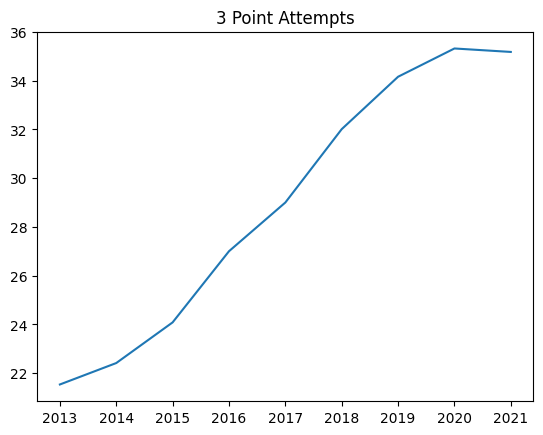

In [30]:
plt.plot(nba_df['FG3A'])
plt.title('3 Point Attempts')
plt.show()

In [31]:
# Calculating Linear regression:
seasons = [year for year in range(2013, 2022)]
stats.linregress(seasons, nba_df['FG3A'])

LinregressResult(slope=1.9741558583851886, intercept=-3952.9065292844743, rvalue=0.9849344305521527, pvalue=1.3617835779298178e-06, stderr=0.13100593043332343, intercept_stderr=264.23917818686704)

From the linear regression stat, we can see that the pvalue is significanyly less than 0.01 meaning there is significant evidence for strong correlation between turnovers and seasons, with an average of about 2 more 3s being attempted every year.

This is what people mean when they say 'Curry revolutionized the league'. You can make the argument that the NBA was probably headed towards this direction, but Curry was the one to popularize this method of playing.

Some Interesting stats I noticed is how points increased, asist increased, FGA increased, turnover decreased, fouls decreased.
This leads me to think that possesions are increasing by year.
The way to calculate possesions is:
(FGA – OR) + TO + (Y * FTA), where FGA = field goal attempts, OR = offensive rebounds, TO = turnovers, Y = some number between zero and 1 (Most people use 0.44).

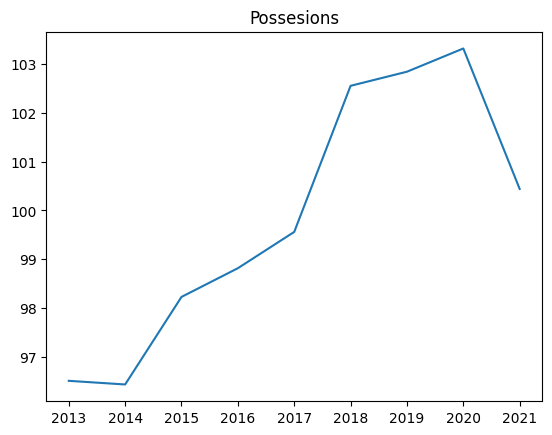

In [32]:
# As we can see, each team on average is getting more and more possesions. This leads to teams attempting more shots which
# results in teams scoring more points
nba_df['POSSESIONS'] = nba_df['FGA'] - nba_df['OREB'] + nba_df['TO'] + (0.44 * nba_df['FTA'])
plt.plot(nba_df['POSSESIONS'])
plt.title('Possesions')
plt.show()

In [33]:
stats.linregress(seasons, nba_df['POSSESIONS'])

LinregressResult(slope=0.8210577688526025, intercept=-1556.218031977927, rvalue=0.8570012272137443, pvalue=0.0031566383019536837, stderr=0.18660165938921816, intercept_stderr=376.37585536944937)

From the linear regression stat, we can see that the pvalue is less than 0.01 meaning there is significant evidence for correlation between Possesions as the NBA progresses with an average of 0.8 possesions increasing each year.

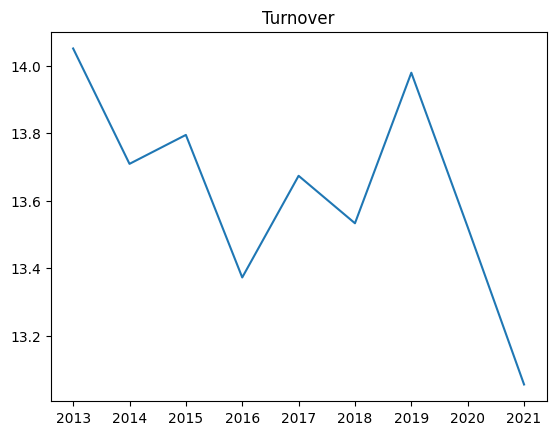

In [34]:
# A bit chatotic, but shows its trending downwards
plt.plot(nba_df['TO'])
plt.title('Turnover')
plt.show()

In [35]:
stats.linregress(seasons, nba_df['TO'])

LinregressResult(slope=-0.0669122093810744, intercept=148.5944785266285, rvalue=-0.5977070696398611, pvalue=0.08916169430355343, stderr=0.03392249102309447, intercept_stderr=68.4217204545254)

From the linear regression stat, we can see that the pvalue is greater than 0.05 meaning there is no significant evidence for correlation between turnovers and seasons.

I am not sure why Turnover have decreased however, especially when asists and possesions has increased. The only thing I can think of for this happening is the players are just getting much better then what they were before. Measuring this will be difficult because measuring skill is not possible but what I can do is measure a team True Shooting percentage. This is an advanced stat which measures how efficent a player is when it comes to getting the ball in the basket. If the True Shooting percentage goes up, then I can say that players are becoming better at shooting the basket and maybe that has correlation to them being better at basketball in general

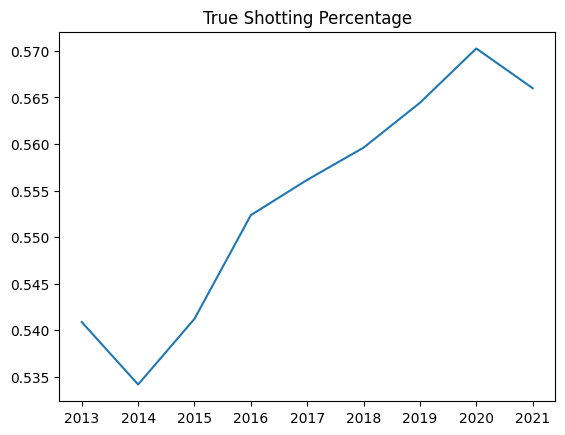

In [36]:
nba_df['TS'] = nba_df['PTS']/ (2 * (nba_df['FGA'] + (0.44 * nba_df['FTA'])))
plt.plot(nba_df['TS'])
plt.title('True Shotting Percentage')
plt.show()

In [37]:
stats.linregress(seasons, nba_df['TS'])

LinregressResult(slope=0.004374095670324416, intercept=-8.268654000301977, rvalue=0.9452578618067498, pvalue=0.00011976221822445298, stderr=0.0005707401532431037, intercept_stderr=1.1511838323072043)

From the linear regression stat, we can see that the pvalue is less than 0.01 meaning there is evidence for correlation between a teams true shooting numbers and seasons with an average of 0.0006 shooting increase happening every year.

As a results, this stat shows that players are becoming better shooters. My idea is maybe there is a correlations with them being better shooters and also better basketball players in the sence that they make better decisions such as turning the ball over less. Obviosuly this is not something that can be measured because there is no 'better player' statistic or there is no way to track basketball IQ but when possesions have increased while turnover decreased it may be a safe bet to say that players are becoming better then previous generations.

# FOR INJURIES CORRELATION
There does not appear to be any correlation between number of possesions and injuries in the NBA

In [38]:
injury = pd.read_csv('NBA Player Injury Stats(1951 - 2023).csv')

year2013 = injury.loc[(injury['Date'] >= '2013-10-29') & (injury['Date'] < '2014-04-17')]
year2013['Season'] = 2013
year2014 = injury.loc[(injury['Date'] >= '2014-10-28') & (injury['Date'] < '2015-04-16')]
year2014['Season'] = 2014
year2015 = injury.loc[(injury['Date'] >= '2015-10-27') & (injury['Date'] < '2016-04-14')]
year2015['Season'] = 2015
year2016 = injury.loc[(injury['Date'] >= '2016-10-25') & (injury['Date'] < '2017-04-13')]
year2016['Season'] = 2016
year2017 = injury.loc[(injury['Date'] >= '2017-10-17') & (injury['Date'] < '2018-04-12')]
year2017['Season'] = 2017
year2018 = injury.loc[(injury['Date'] >= '2018-10-16') & (injury['Date'] < '2019-04-11')]
year2018['Season'] = 2018
year2019 = injury.loc[(injury['Date'] >= '2019-10-22') & (injury['Date'] < '2020-08-16')]
year2019['Season'] = 2019
year2020 = injury.loc[(injury['Date'] >= '2020-12-22') & (injury['Date'] < '2021-05-17')]
year2020['Season'] = 2020
year2021 = injury.loc[(injury['Date'] >= '2021-10-19') & (injury['Date'] < '2022-04-11')]
year2021['Season'] = 2021

total_injuries = pd.concat([year2013, year2014, year2015, year2016, year2017, year2018, year2019, year2020, year2021])
total_injuries.head()

C:\Users\Eitan\AppData\Local\Temp\ipykernel_12868\3841874982.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year2013['Season'] = 2013
C:\Users\Eitan\AppData\Local\Temp\ipykernel_12868\3841874982.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year2014['Season'] = 2014
C:\Users\Eitan\AppData\Local\Temp\ipykernel_12868\3841874982.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,Unnamed: 0,Date,Team,Acquired,Relinquished,Notes,Season
19623,19623,2013-10-29,76ers,NaN,Jason Richardson,placed on IL recovering from surgery on left k...,2013
19624,19624,2013-10-29,76ers,NaN,Nerlens Noel,placed on IL recovering from surgery on left k...,2013
19625,19625,2013-10-29,Clippers,NaN,Maalik Wayns,placed on IL recovering from surgery on left k...,2013
19626,19626,2013-10-29,Heat,NaN,Greg Oden,placed on IL with surgery on knee,2013
19627,19627,2013-10-29,Heat,NaN,Roger Mason Jr.,placed on IL,2013


In [39]:
# Removed the amount of injuries which covid affected.
faired_injuries = total_injuries.loc[total_injuries['Notes'] != 'placed on IL with NBA health and safety protocols']
faired_injuries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15090 entries, 19623 to 35840
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    15090 non-null  int64 
 1   Date          15090 non-null  object
 2   Team          15090 non-null  object
 3   Acquired      7375 non-null   object
 4   Relinquished  7714 non-null   object
 5   Notes         15090 non-null  object
 6   Season        15090 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 943.1+ KB


In [40]:
# Now we have each Note repersenting an injury that is not covid related.
count_injuries = faired_injuries.groupby('Season').count()
count_injuries

,Unnamed: 0,Date,Team,Acquired,Relinquished,Notes
Season,,,,,,
2013,1060,1060,1060,501,559,1060
2014,1398,1398,1398,664,734,1398
2015,1467,1467,1467,710,757,1467
2016,1760,1760,1760,850,910,1760
2017,2290,2290,2290,1090,1200,2290
2018,1605,1605,1605,746,858,1605
2019,1549,1549,1549,718,831,1549
2020,1544,1544,1544,789,755,1544
2021,2417,2417,2417,1307,1110,2417


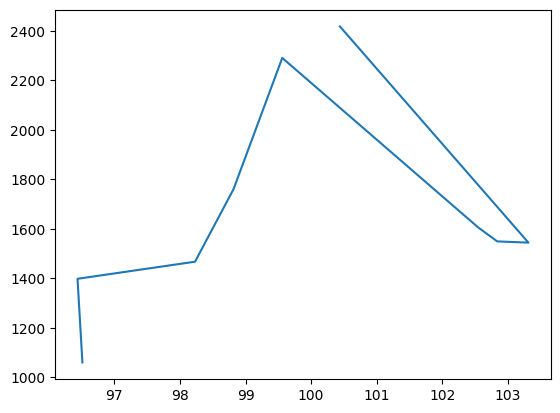

In [41]:
possesions = nba_df['POSSESIONS']
plt.plot(possesions, count_injuries['Notes'])
plt.show()

In [42]:
injuries = count_injuries['Notes']
stats.pearsonr(injuries, possesions)

PearsonRResult(statistic=0.27602862436884185, pvalue=0.47216968388360475)

In [43]:
stats.linregress(injuries, possesions)

LinregressResult(slope=0.0016882893097974207, intercept=97.0247893883451, rvalue=0.2760286243688418, pvalue=0.4721696838836048, stderr=0.002221951809443478, intercept_stderr=3.832324333160521)

# Machine Learning Algorithm with K-Nearest Neighbor
I want to create a KNN algorithm which will take the averages of the 21-22 season of all the players. This will be used as the 'Training model'. Then you can choose, or take a random player, from the 21-22 season and see the 5 players who shares the chosen player's closest stats. 

For this calculation I tried normalizing the data, but when I inputed different players the same 5 players came out. So I stuck with doing the normal calculation.
I also dropped games played because games played just tells how injury prone a player is. If he played 82 games then he is very vulnerable, and if he played less than that then he would be injury prone. The reason why I am dropping this stat is because I dont want it pulling on data which may affect the actual game stat.

In [44]:
# We want to divide the total data by the games played so we get the per game data:
player_averages_21_22 = players_21_22.groupby(['PLAYER_ID', 'PLAYER_NAME']).sum() 

for col in player_averages_21_22.columns[0:-1]:
    player_averages_21_22[col] = player_averages_21_22[col]/(player_averages_21_22['GP'])
player_averages_21_22.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 608 entries, (2207, 'Joe Johnson') to (1630994, 'Gabriel Lundberg')
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MIN         608 non-null    float64
 1   FGM         608 non-null    float64
 2   FGA         608 non-null    float64
 3   FG_PCT      608 non-null    float64
 4   FG3M        608 non-null    float64
 5   FG3A        608 non-null    float64
 6   FG3_PCT     608 non-null    float64
 7   FTM         608 non-null    float64
 8   FTA         608 non-null    float64
 9   FT_PCT      608 non-null    float64
 10  OREB        608 non-null    float64
 11  DREB        608 non-null    float64
 12  REB         608 non-null    float64
 13  AST         608 non-null    float64
 14  STL         608 non-null    float64
 15  BLK         608 non-null    float64
 16  TO          608 non-null    float64
 17  PF          608 non-null    float64
 18  PTS         608 non-null

In [45]:
# Create a new dataframe in order to not have an index interfere.
reset_index = player_averages_21_22.reset_index()
# I remove categorical data so there is no issue with the calculation.
training_model = reset_index.drop(['PLAYER_NAME'], axis=1)

# Dropping GP:
training_model = training_model.drop(['GP'], axis=1)
training_model

,PLAYER_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,2207,1.950000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-5.000000
1,2544,37.220833,11.428571,21.803571,0.523964,2.875000,8.000000,0.355589,4.535714,6.000000,0.765089,1.125000,7.071429,8.196429,6.232143,1.303571,1.053571,3.500000,2.160714,30.267857,-2.089286
2,2546,25.988889,4.623188,10.478261,0.435101,2.159420,5.753623,0.354565,1.913043,2.304348,0.596391,0.898551,3.275362,4.173913,0.985507,0.681159,0.753623,0.855072,2.405797,13.318841,-1.275362
3,2617,6.401282,1.076923,2.384615,0.438462,0.076923,0.307692,0.076923,0.230769,0.230769,0.076923,0.307692,1.615385,1.923077,0.307692,0.076923,0.076923,0.384615,1.153846,2.461538,-1.153846
4,2730,16.178889,2.233333,3.650000,0.553100,0.133333,0.250000,0.105550,1.600000,2.433333,0.481767,1.966667,3.966667,5.933333,0.583333,0.566667,0.600000,0.783333,1.916667,6.200000,-2.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,1630758,14.706667,1.200000,4.000000,0.233200,0.400000,3.000000,0.080000,0.000000,0.000000,0.000000,0.400000,2.600000,3.000000,0.400000,0.200000,0.000000,0.800000,1.400000,2.800000,-7.000000
604,1630787,15.322222,1.666667,4.666667,0.344333,0.666667,2.000000,0.277667,0.666667,0.666667,0.333333,2.000000,3.000000,5.000000,1.000000,0.000000,0.333333,0.000000,2.333333,4.666667,2.666667
605,1630792,11.162281,1.263158,2.736842,0.297789,0.684211,1.894737,0.217526,0.578947,0.736842,0.201789,0.578947,1.263158,1.842105,0.421053,0.368421,0.157895,0.157895,1.263158,3.789474,-1.631579
606,1630846,19.130303,2.636364,4.590909,0.488409,0.590909,1.318182,0.268909,1.090909,1.318182,0.412909,1.545455,2.681818,4.227273,0.863636,0.272727,0.681818,1.000000,2.363636,6.954545,-1.272727


In [55]:
# create a dataframe with no index whatsover. This allows me to pull purely player stats and no categorical data.
no_index = player_averages_21_22.reset_index()

# Here is where the input happens. In this case the player which I want to find 5 players that
# are most related to him is Jayson Tatum.
idx = no_index.loc[no_index['PLAYER_NAME'] == "De'Aaron Fox"].index[0]
temp = player_averages_21_22.reset_index(drop=True)
rand_player_21_22 = temp.iloc[idx]

#Droping Games played:
rand_player_21_22 = rand_player_21_22.drop(['GP'])
rand_player_21_22

MIN           35.312994
FGM            8.745763
FGA           18.508475
FG_PCT         0.468339
FG3M           1.254237
FG3A           4.220339
FG3_PCT        0.285610
FTM            4.423729
FTA            5.898305
FT_PCT         0.743390
OREB           0.423729
DREB           3.491525
REB            3.915254
AST            5.593220
STL            1.152542
BLK            0.423729
TO             2.847458
PF             2.915254
PTS           23.169492
PLUS_MINUS    -3.254237
Name: 236, dtype: float64

In [56]:
diff = training_model - rand_player_21_22
diff = diff.drop(['PLAYER_ID'], axis=1)
diff_sq = diff ** 2

diff_sum = diff_sq.sum(axis=1)
dist = diff_sum**(1/2)
dist_sorted = dist.sort_values()
# Reason why I do a [1:6] slice is because obviosuly the player who will share the most resemblence to 
# the random player would be the random player himself, so I get rid of him:
reset_index.loc[dist_sorted.index][1:6]['PLAYER_NAME']

84                Bradley Beal
296    Shai Gilgeous-Alexander
131                Zach LaVine
370                 RJ Barrett
104                CJ McCollum
Name: PLAYER_NAME, dtype: object

# Machine Learning Algorithm with K-Means Clustering
I want to use K-Means Clustering on the 3 positions of the NBA (Guards, Forwards, and Centers). With this clustering I will be able to see the 2 types of players there are. Those who have a positive box plus minus which means when they were on the court, they had a positive contribution to the score board, and those who have a negative positive box plus minus which repersents those who had a negative contribution.

In [48]:
merged = pd.merge(games_detail, rs_21_22, on='GAME_ID')
merged = merged.drop(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY',  'PLAYER_ID', 'PLAYER_NAME', 'NICKNAME', 'COMMENT',
                       'HOME_TEAM_ID', 'SEASON',  'TEAM_ID_home', 'PTS_home',  'FG_PCT_home','FT_PCT_home',  'FG3_PCT_home',  
                       'AST_home',  'REB_home', 'TEAM_ID_away',  'PTS_away',  'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 
                      'AST_away',  'REB_away', 'HOME_TEAM_WINS'], axis=1)
merged = merged.dropna(axis='rows', thresh=21)

merged[['minutes', 'seconds']] = merged['MIN'].str.split(':', n=1, expand=True)
merged['minutes'] = merged['minutes'].astype(float)
merged['seconds'] = merged['seconds'].astype(float)
merged['MIN'] = merged['minutes'] + merged['seconds'] / 60
merged = merged.drop(['minutes', 'seconds'], axis=1)

merged

,START_POSITION,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,F,29.916667,5.0,11.0,0.455,0.0,4.0,0.000,2.0,2.0,1.000,1.0,3.0,4.0,4.0,0.0,1.0,2.0,4.0,12.0,-30.0
1,F,38.166667,7.0,10.0,0.700,3.0,5.0,0.600,0.0,0.0,0.000,0.0,6.0,6.0,2.0,1.0,2.0,0.0,4.0,17.0,-18.0
2,C,11.450000,1.0,1.0,1.000,0.0,0.0,0.000,1.0,2.0,0.500,2.0,2.0,4.0,2.0,0.0,0.0,1.0,1.0,3.0,-10.0
3,G,36.483333,8.0,22.0,0.364,2.0,8.0,0.250,3.0,3.0,1.000,2.0,2.0,4.0,3.0,0.0,0.0,5.0,2.0,21.0,-29.0
4,G,38.333333,7.0,25.0,0.280,4.0,14.0,0.286,8.0,10.0,0.800,2.0,3.0,5.0,8.0,1.0,0.0,3.0,5.0,26.0,-13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31414,F,36.750000,13.0,23.0,0.565,5.0,11.0,0.455,3.0,6.0,0.500,1.0,10.0,11.0,5.0,1.0,1.0,4.0,5.0,34.0,-2.0
31415,F,38.916667,15.0,26.0,0.577,1.0,5.0,0.200,2.0,7.0,0.286,2.0,9.0,11.0,2.0,1.0,2.0,0.0,0.0,33.0,-2.0
31416,C,12.916667,1.0,1.0,1.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0,2.0,2.0,1.0,1.0,0.0,0.0,3.0,2.0,2.0
31417,G,30.616667,3.0,9.0,0.333,2.0,8.0,0.250,0.0,0.0,0.000,0.0,2.0,2.0,0.0,0.0,1.0,1.0,4.0,8.0,10.0


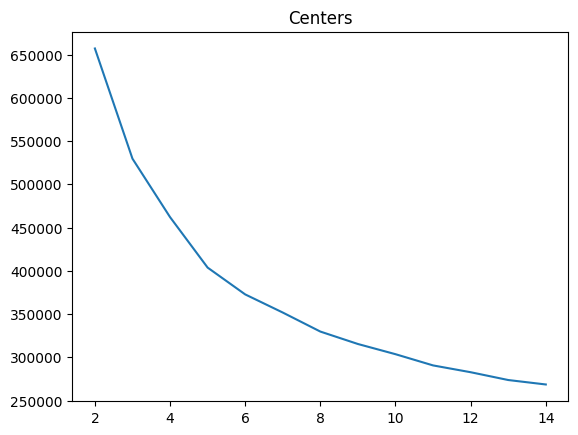

In [49]:
guards_df = merged.loc[merged['START_POSITION']== 'C']
guards_df = guards_df.drop(['START_POSITION'], axis=1)

inertias = []
ks = []
for i in range(2, 15):
    ks.append(i)
    kmeans = KMeans(n_clusters= i, n_init='auto')
    kmeans.fit(guards_df)
    kmeans.inertia_
    inertias.append(kmeans.inertia_)

plt.plot(ks, inertias) 
plt.title('Centers')
plt.show()

In [50]:
# Guards
guards_df = merged.loc[merged['START_POSITION']== 'G']
guards_df = guards_df.drop(['START_POSITION'], axis=1)

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(guards_df)
df_norm_clusterd = guards_df.copy()
df_norm_clusterd['cluster'] = kmeans.labels_
print(df_norm_clusterd.groupby('cluster').mean().T)

cluster             0          1          2
MIN         36.694599  28.860645  31.194389
FGM          9.229831   3.796774   5.315428
FGA         19.393898  10.270430  11.603998
FG_PCT       0.480209   0.367145   0.459888
FG3M         3.196610   1.362366   2.123048
FG3A         7.959322   4.720430   5.427233
FG3_PCT      0.390127   0.268481   0.376805
FTM          4.234576   1.473118   1.952530
FTA          5.114576   1.867742   2.344785
FT_PCT       0.739026   0.459704   0.548776
OREB         0.819661   0.604301   0.618988
DREB         4.405424   2.818817   3.657089
REB          5.225085   3.423118   4.276077
AST          6.054237   3.636022   5.198626
STL          1.250847   0.864516   1.179888
BLK          0.392542   0.316129   0.365397
TO           2.798644   1.827957   1.819488
PF           2.419661   2.074194   2.111181
PTS         25.890847  10.429032  14.706433
PLUS_MINUS   0.411525 -11.328495  13.668332


In [51]:
# Forwards
forwards_df = merged.loc[merged['START_POSITION']== 'F']
forwards_df = forwards_df.drop(['START_POSITION'], axis=1)

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(forwards_df)
df_norm_clusterd = forwards_df.copy()
df_norm_clusterd['cluster'] = kmeans.labels_
print(df_norm_clusterd.groupby('cluster').mean().T)

cluster             0          1          2
MIN         36.604891  27.344686  30.280657
FGM          9.027113   3.398257   4.792028
FGA         18.011962   8.567401   9.902946
FG_PCT       0.507757   0.396046   0.495138
FG3M         2.362839   1.057919   1.566724
FG3A         6.026316   3.722706   4.073946
FG3_PCT      0.366551   0.244683   0.352128
FTM          4.655502   1.389031   1.794916
FTA          5.793461   1.844182   2.268053
FT_PCT       0.745048   0.433836   0.510940
OREB         1.411483   1.014352   1.117851
DREB         5.887560   3.450538   4.484691
REB          7.299043   4.464890   5.602542
AST          3.803828   1.852896   2.657423
STL          1.034290   0.792414   1.005777
BLK          0.669856   0.511533   0.631427
TO           2.307815   1.267043   1.264587
PF           2.430622   2.201435   2.285384
PTS         25.072568   9.243465  12.945696
PLUS_MINUS   0.126794 -10.822655  12.563836


In [52]:
# Centers
centers_df = merged.loc[merged['START_POSITION']== 'C']
centers_df = centers_df.drop(['START_POSITION'], axis=1)

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(centers_df)
df_norm_clusterd = centers_df.copy()
df_norm_clusterd['cluster'] = kmeans.labels_
print(df_norm_clusterd.groupby('cluster').mean().T)

cluster             0          1          2
MIN         23.644529  27.584603  34.335861
FGM          3.510436   4.714988   9.161667
FGA          6.858634   7.885749  16.163333
FG_PCT       0.522811   0.617811   0.582508
FG3M         0.301708   0.361179   1.320000
FG3A         1.144213   0.968059   3.251667
FG3_PCT      0.099998   0.118415   0.291088
FTM          1.361480   1.875921   4.750000
FTA          2.074953   2.743243   6.180000
FT_PCT       0.427759   0.508048   0.705643
OREB         2.308349   2.977887   3.061667
DREB         4.602467   6.716216   8.711667
REB          6.910816   9.694103  11.773333
AST          1.461101   2.169533   3.615000
STL          0.512334   0.791155   1.083333
BLK          0.864326   1.271499   1.273333
TO           1.252372   1.402948   2.470000
PF           2.604364   2.684275   2.941667
PTS          8.684061  11.667076  24.393333
PLUS_MINUS  -9.944023  11.872236   2.385000
